In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df_data = pd.read_csv('boston.csv', index_col=0)
df_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## Understand the Boston House Price Dataset
### Characteristics:

#### :Number of Instances: 506 

#### :Number of Attributes: 13 numeric/categorical predictive. The Median Value (attribute 14) is the target.

#### :Attribute Information (in order):
    1. CRIM     per capita crime rate by town
    2. ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
    3. INDUS    proportion of non-retail business acres per town
    4. CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    5. NOX      nitric oxides concentration (parts per 10 million)
    6. RM       average number of rooms per dwelling
    7. AGE      proportion of owner-occupied units built prior to 1940
    8. DIS      weighted distances to five Boston employment centres
    9. RAD      index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    13. LSTAT    % lower status of the population
    14. PRICE     Median value of owner-occupied homes in $1000's
    

In [4]:
df_data.rename(columns = {
    'CRIM':'Crime_Rate',
    'ZN':'Zoned',
    'INDUS':'Non_Retail',
    'RM':'Rooms',
    'DIS':'Distance',
    'RAD':'Radial',
    'PTRATIO':'PT_Ratio',
    'B':'No_of_Blacks'
}, inplace=True)

In [5]:
df_data

,Crime_Rate,Zoned,Non_Retail,CHAS,NOX,Rooms,AGE,Distance,Radial,TAX,PT_Ratio,No_of_Blacks,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [6]:
df_data.isnull().sum()

Crime_Rate      0
Zoned           0
Non_Retail      0
CHAS            0
NOX             0
Rooms           0
AGE             0
Distance        0
Radial          0
TAX             0
PT_Ratio        0
No_of_Blacks    0
LSTAT           0
PRICE           0
dtype: int64

In [16]:
duplicated = df_data[df_data.duplicated() == 'True']
len(duplicated)

0

### Descriptive Statistics and Visualization

#### Crime Rate vs Price

In [19]:
df_data.Crime_Rate.describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: Crime_Rate, dtype: float64

(0.0, 60.0)

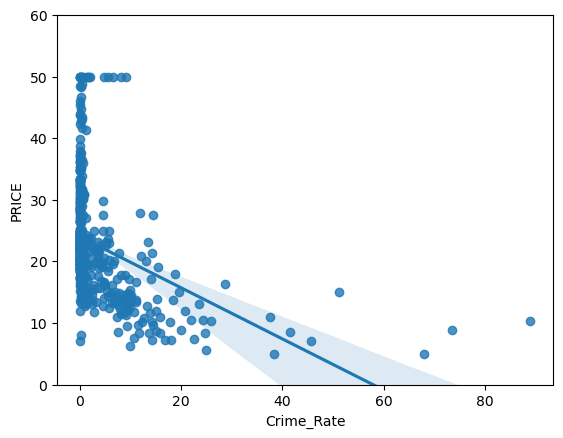

In [33]:
line_plot = sns.regplot(x=df_data.Crime_Rate, y=df_data.PRICE)
line_plot.set_ylim(0, 60)

#### Distance to employment centres vs price

In [35]:
df_data.Distance

0      4.0900
1      4.9671
2      4.9671
3      6.0622
4      6.0622
        ...  
501    2.4786
502    2.2875
503    2.1675
504    2.3889
505    2.5050
Name: Distance, Length: 506, dtype: float64

<Axes: xlabel='Distance', ylabel='PRICE'>

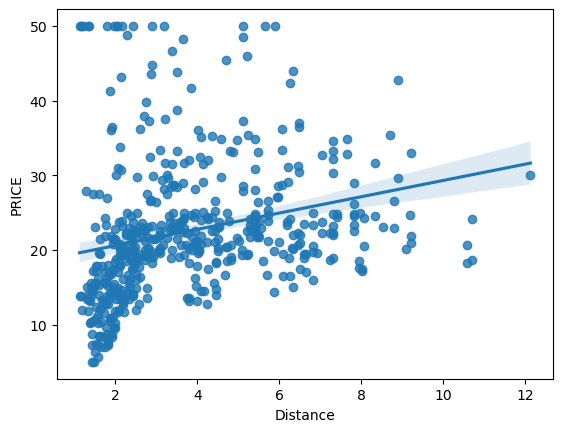

In [37]:
sns.regplot(x=df_data.Distance, y=df_data.PRICE)

#### Rooms vs Price

<Axes: xlabel='Rooms', ylabel='PRICE'>

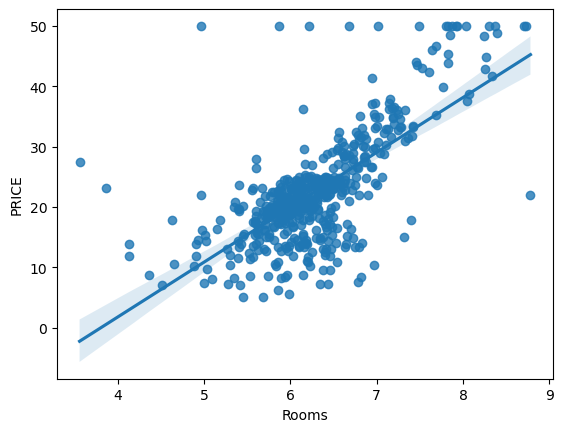

In [38]:
sns.regplot(x=df_data.Rooms, y=df_data.PRICE)

#### Accesibility to radial highways

<Axes: xlabel='Radial', ylabel='PRICE'>

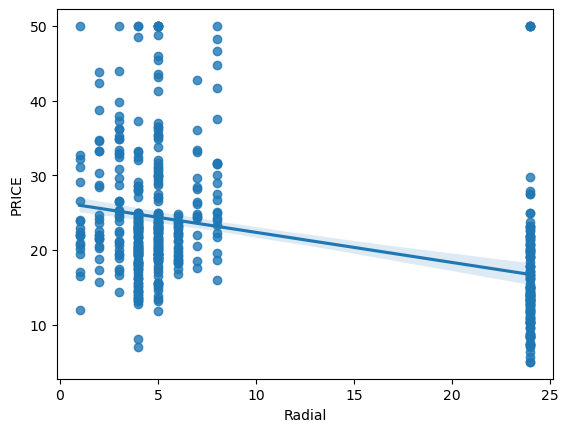

In [39]:
sns.regplot(x=df_data.Radial, y=df_data.PRICE)

#### Tax Rate vs Price

<Axes: xlabel='TAX', ylabel='PRICE'>

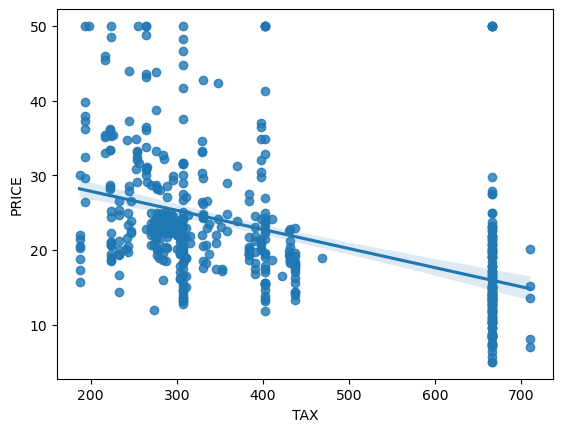

In [40]:
sns.regplot(x=df_data.TAX, y=df_data.PRICE)

<Axes: xlabel='No_of_Blacks', ylabel='PRICE'>

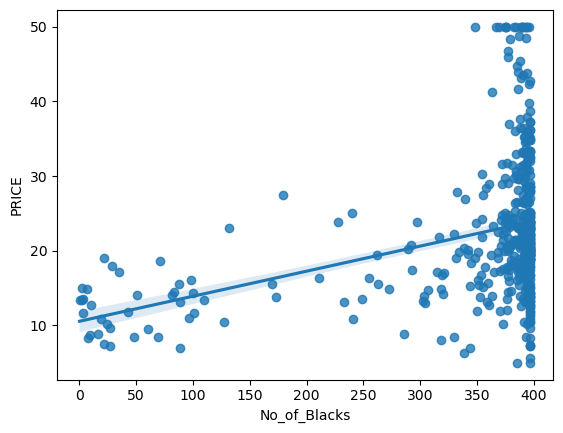

In [41]:
sns.regplot(x=df_data.No_of_Blacks, y=df_data.PRICE)